In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("./DATA/titanic.csv", usecols=["Age", "Fare", "Survived"])

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(714, 3)

In [5]:
df.sample(5)

,Survived,Age,Fare
69,0,26.0,8.6625
784,0,25.0,7.0500
572,1,36.0,26.3875
119,0,2.0,31.2750
605,0,36.0,15.5500


In [6]:
clf = DecisionTreeClassifier()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 1:],
    df.iloc[:, 0],
    test_size=0.15
)

In [9]:
kbin_age = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile")
kbin_fare = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="kmeans")

In [10]:
trf = ColumnTransformer([
    ("first", kbin_age, [0]),
    ("second", kbin_fare, [1])
])

In [11]:
X_train_new = trf.fit_transform(X_train)
X_test_new = trf.transform(X_test)

C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [12]:
trf.named_transformers_["first"]

KBinsDiscretizer(encode='ordinal')

In [13]:
trf.named_transformers_["first"].n_bins_

array([5])

In [14]:
trf.named_transformers_["first"].bin_edges_

array([array([ 0.42, 19.  , 25.  , 31.  , 41.  , 80.  ])], dtype=object)

In [17]:
X_train_new[:10, :]

array([[0., 0.],
       [2., 0.],
       [3., 0.],
       [2., 2.],
       [4., 0.],
       [0., 0.],
       [2., 0.],
       [1., 0.],
       [2., 0.],
       [0., 0.]])

In [21]:
X = df[["Age", "Fare"]]
y = df["Survived"]

In [ ]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode="ordinal", strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode="ordinal", strategy=strategy)
    
    trf = ColumnTransformer([
        ("first", kbin_age, [0]),
        ("second", kbin_fare, [1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring="accuracy")))
    
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.hist(X["Age"])
    plt.title("Before")
    
    plt.subplot(122)
    plt.hist(X_trf[:, 0], color="green")
    plt.title("After")
    
    plt.show()

0.6345266040688575


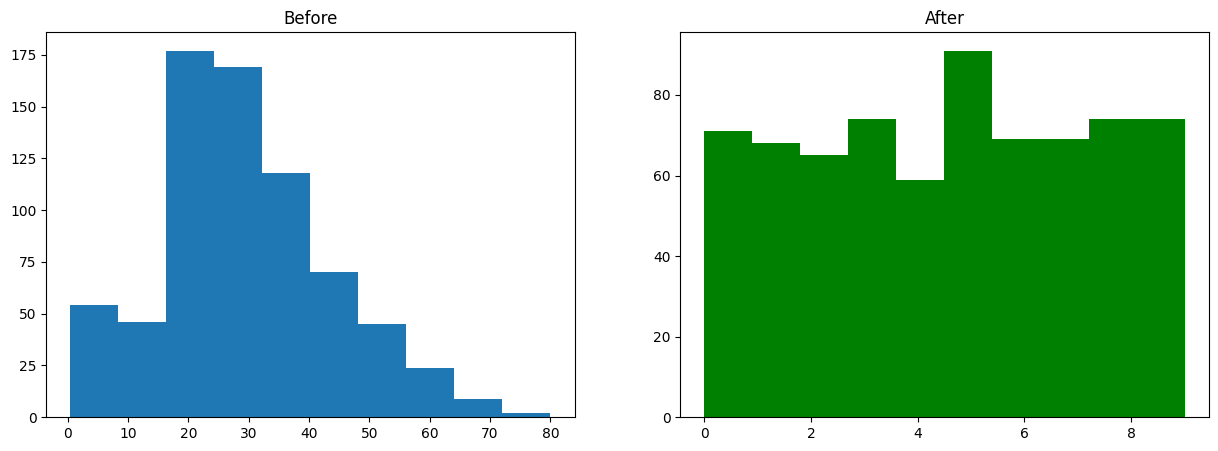

In [23]:
discretize(10, "quantile")

C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6303599374021909


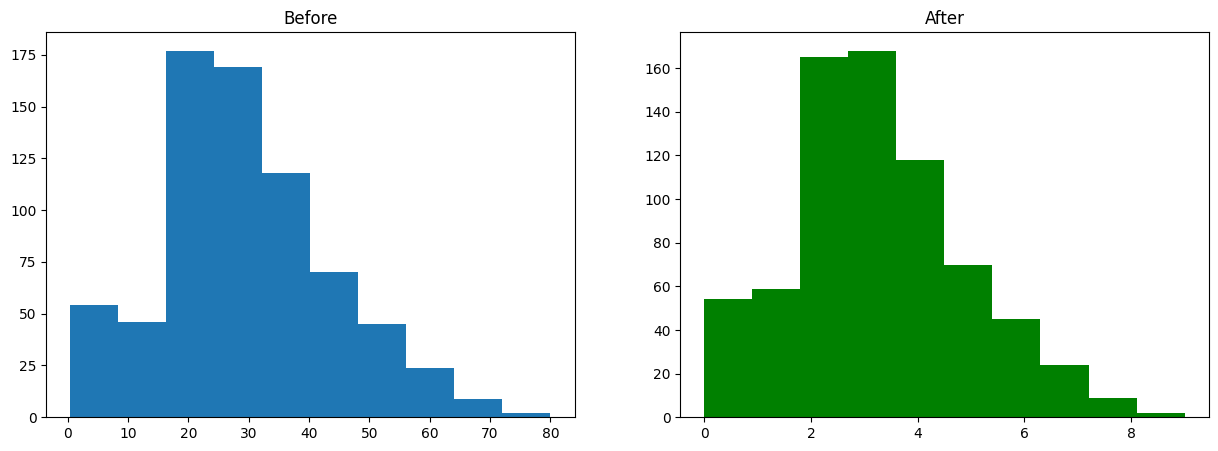

In [ ]:
discretize(10, "kmeans") 